# Numerical Simulation Laboratory                                                         
                                        Department of Physics, University of Milan(It)
                                        Spring 2020 
                                                                     Mattia Corigliano
## 9<sup>th </sup> Computational Exercise

## Genetic Algorithm (GA) solution of the Travelling Salesman Problem (TSP)

*In this computational exercise we explored the ability of genetic algorithms to solve optimization problems. In particular, we focused on the famous travelling salesman problem and provided GA solutions of this problem for 32 cities on a circle and then inside a square.* 

In [5]:
import numpy as np
import matplotlib.pyplot as plt

##  setting the Layout
import matplotlib as mpl
## LINES
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '-'
## AXES
mpl.rcParams['axes.linewidth'] = 1 ## edge linewidth
mpl.rcParams['axes.grid'] = True ## display grid or not
mpl.rcParams['axes.titlesize'] = 16 ## fontsize of the axes title
#mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.labelsize'] = 14  ## fontsize of the x any y labels
mpl.rcParams['axes.formatter.limits'] = [-2,6] # use scientific notation if log10
mpl.rcParams['axes.formatter.use_mathtext'] = True # When True, use mathtext for scientific
mpl.rcParams['legend.fontsize'] = 12
## TICKS
mpl.rcParams['xtick.labelsize'] = 12 ## fontsize of the tick labels
mpl.rcParams['ytick.labelsize'] = 12 
mpl.rcParams['xtick.minor.visible'] = True ## visibility of minor ticks on x-axis
mpl.rcParams['ytick.minor.visible'] = True
## FIGURE
mpl.rcParams['figure.titleweight'] = 'bold' ## weight of the figure title
mpl.rcParams['figure.subplot.wspace'] = 0.4
mpl.rcParams['figure.subplot.hspace'] = 0.4
## ERRORBARS
mpl.rcParams['errorbar.capsize'] = 2  ## length of end cap on error bars in pixels

### A. The genetic algorithm code

The general structure of our genetic algorithm is composed of the following blocks:

 - **Init_prng()** <-- initialize the parallel random number generator
 
 - **Input()** <-- initialize the problem

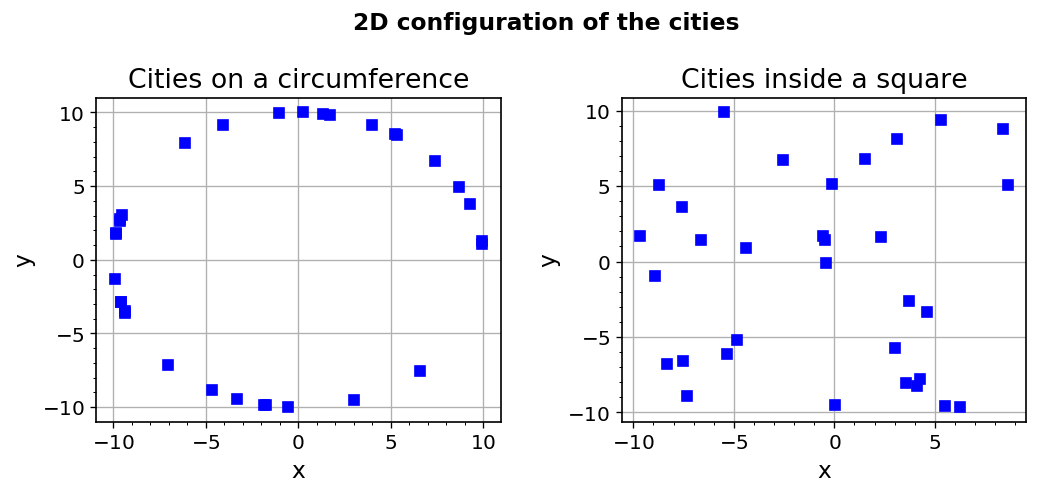

In [37]:
cities_configuration = np.loadtxt("data/initial_config/circle_cities_config.txt").T
cities_configuration2 = np.loadtxt("data/initial_config/square_cities_config.txt").T

plt.figure(figsize=(10, 4), dpi=120)
mpl.rcParams['figure.subplot.top'] = 0.8
plt.suptitle("2D configuration of the cities", size=14)
plt.subplot(1, 2, 1);
plt.plot(cities_configuration[1], cities_configuration[2], 'bs', markersize = 6)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Cities on a circumference")
plt.subplot(1, 2, 2);
plt.plot(cities_configuration2[1], cities_configuration2[2], 'bs', markersize = 6)
plt.subplots_adjust(wspace=0.3)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Cities inside a square")
plt.show()

 - **Generate_Tours()** <-- generate a random population of possible candidate solutions
 
 - **Check()** <-- ensure the generated tours satisfy the constraints
	
 - **Sort_by_DecrFitness()** <-- evaluate the fitness of each candidate solution and sort the population
 
*the fitness of each candidate solution is evaluated with respect to a cost function. Here we have considered the lenght of the tour as the cost function:*
 
 \begin{equation} L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}| \end{equation}
 
**cycle over generations**
 
 - **Get_Elite()** <-- save the fittest solutions
 
 - **Select_Parents()** <--select parents for reproduction
 
*selection is performed with respect to the fitness (i.e. the higher the fitness of an individual the higher the probability to be selected) and with replacement (i.e. individuals can be selected multiple times).*
*The implemented selection operator performs a roulette wheel selection.*
 
 - **CrossOver()** <-- with some probability cross-over the selected parents 
 
 - **Reproduce()** <-- generate the new individuals from parents
 
 - **Mutate()** <-- mutate with some probability the newly generated individuals
 
*Here, we implemented the following mutation operators:*

*single site swap*: $\left[ 1, 2, 3, 4, 5, \dots \right] \to \left[ 1, 2, 4, 3, 5, \dots \right]$ 

*double site contiguous swap*: $\left[ 1, 2, 3, 4, 5, \dots \right] \to \left[ 1, 4, 5, 2, 3, \dots \right]$ 

*inversion of 3/4 sites*: $\left[ 1, 2, 3, 4, 5, \dots \right] \to \left[ 1, 2, 5,4, 3, \dots \right]$ 

*traslation of 3 sites*: $\left[ 1, 2, 3, 4, 5, \dots, 12, 13, 14, \dots \right] \to \left[ 1, 2, 12,13,14, \dots, 3, 4, 5, \dots \right]$ 

*push at the end the first 3/4 sites*: $\left[ 1, 2, 3, 4, 5, \dots, 29, 31, 32 \right] \to \left[ 1, 29, 31,32 \dots, 2,3,4 \right]$ 
 
 
 - **Add_Elite()** <-- replace current worst $n_{elite}$ solutions with the previous $n_{elite}$ best solutions
 
 - **Check()**
 
 - **Sort_by_DecrFitness()**

### B. Genetic Algorithm solution

|  | Circumference |  Square |
|:---:|:---:|:---:|
| shortest tour length | 62.2256| 96.5096 |

#### Circle

Input Parameters:
- N_cities = 32
- N_tours = 1000
- N_generations = 500
- N_elite = 30
- CrossOver probabilty = 0.5
- single site swap probability = 0.1 
- double site contiguous swap probability = 0.1
- inversion of 3/4 sites probability = 0.1
- translation of 3 sites probaiblity = 0.1
- push at the end 3/4 sites probability = 0.1

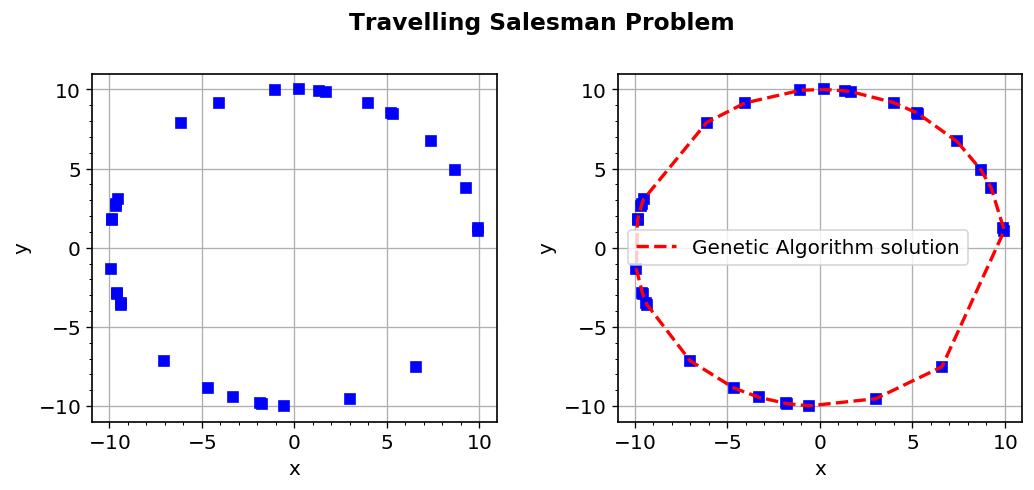

In [8]:
circle_solution = np.loadtxt("data/solution/circle_opt_tour.txt").T

plt.figure(figsize=(10, 4), dpi=120)
plt.suptitle("Travelling Salesman Problem", size =14)
mpl.rcParams['figure.subplot.top'] = 0.85

plt.subplot(1, 2, 1);
plt.plot(cities_configuration[1], cities_configuration[2], 'bs', markersize = 6)
plt.xlabel("x", size = 12)
plt.ylabel("y", size = 12)
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(cities_configuration[1], cities_configuration[2], 'bs', markersize = 6)
plt.plot(circle_solution[1], circle_solution[2], 'r--', lw=2, label = "Genetic Algorithm solution")
plt.xlabel("x", size = 12)
plt.ylabel("y", size = 12)
plt.legend()
plt.grid(True)
plt.subplots_adjust(wspace = 0.3)
plt.show()

#### Square

Input Parameters:
- N_cities = 32
- N_tours = 1000
- N_generations = 1000
- N_elite = 30
- CrossOver probabilty = 0.6
- single site swap probability = 0.01 
- double site contiguous swap probability = 0.01
- inversion of 3/4 sites probability = 0.01
- translation of 3 sites probaiblity = 0.01
- push at the end 3/4 sites probability = 0.01

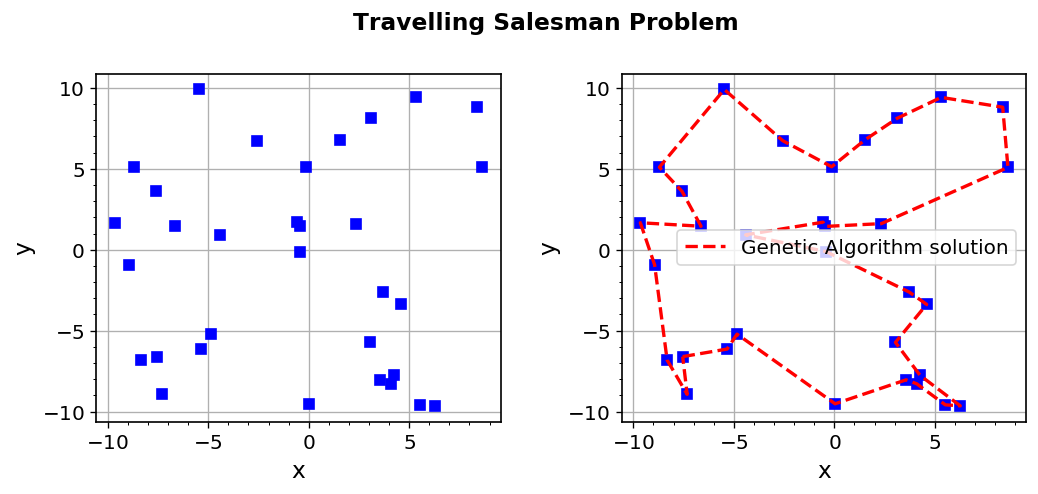

In [31]:
square_solution = np.loadtxt("data/solution/square_opt_tour.txt").T

plt.figure(figsize=(10, 4), dpi=120)
plt.suptitle("Travelling Salesman Problem", size =14)
mpl.rcParams['figure.subplot.top'] = 0.85

plt.subplot(1, 2, 1);
plt.plot(cities_configuration2[1], cities_configuration2[2], 'bs', markersize = 6)
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1, 2, 2)
plt.plot(cities_configuration2[1], cities_configuration2[2], 'bs', markersize = 6)
plt.plot(square_solution[1], square_solution[2], 'r--', label = "Genetic Algorithm solution")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.subplots_adjust(wspace = 0.3)
plt.show()

### C. Genetic algorithm convergence

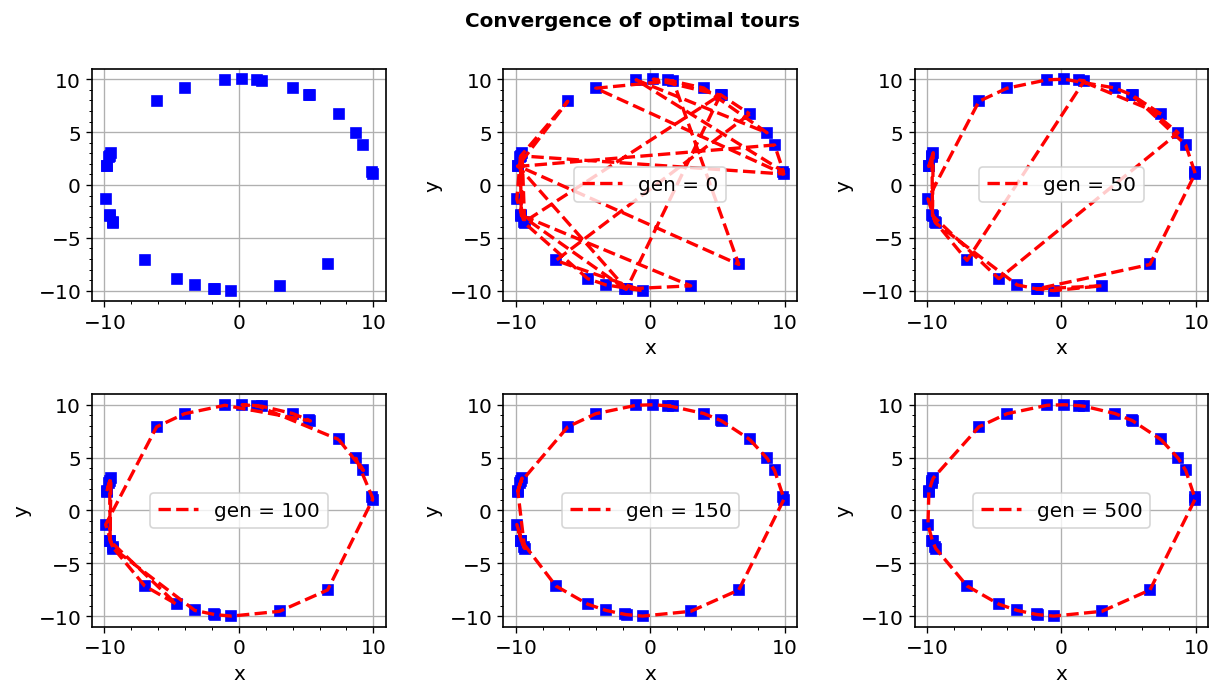

In [35]:
tour_convergence = np.loadtxt("data/convergence/circle_tour_convergence.txt").T

plt.figure(figsize=(12, 6), dpi=120)
plt.suptitle("Convergence of optimal tours", size=12)
mpl.rcParams['figure.subplot.top'] = 0.9

plt.subplot(2, 3, 1);
plt.plot(cities_configuration[1], cities_configuration[2], 'bs', markersize = 6)
plt.grid(True)
gen = [0, 50, 100, 150, 500]
for k in range(5):
    plt.subplot(2, 3, k+2);
    plt.plot(cities_configuration[1], cities_configuration[2], 'bs', markersize = 6)
    plt.plot(tour_convergence[1][k*33:(k+1)*33], 
             tour_convergence[2][k*33:(k+1)*33], 'r--', label = 'gen = {}'.format(gen[k]))    
    plt.xlabel('x', size=12)
    plt.ylabel('y', size=12)
    plt.legend()

plt.show()


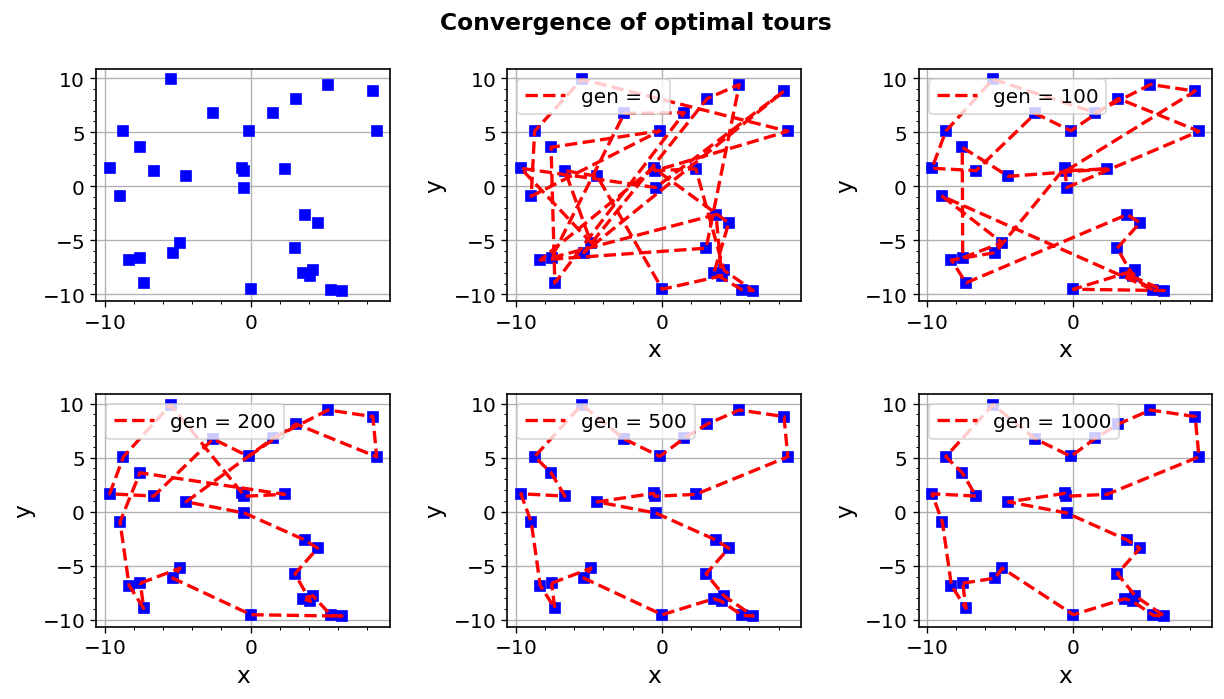

In [33]:
tour_convergence = np.loadtxt("data/convergence/square_tour_convergence.txt").T

plt.figure(figsize=(12, 6), dpi=120)
plt.suptitle("Convergence of optimal tours", size=14)
mpl.rcParams['figure.subplot.top'] = 0.9

plt.subplot(2, 3, 1);
plt.plot(cities_configuration2[1], cities_configuration2[2], 'bs', markersize = 6)
gen = [0, 100, 200, 500, 1000]
for k in range(5):
    plt.subplot(2, 3, k+2);
    plt.plot(cities_configuration2[1], cities_configuration2[2], 'bs', markersize = 6)
    plt.plot(tour_convergence[1][k*33:(k+1)*33], 
             tour_convergence[2][k*33:(k+1)*33], 'r--', label = 'gen = {}'.format(gen[k]))    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
plt.show()

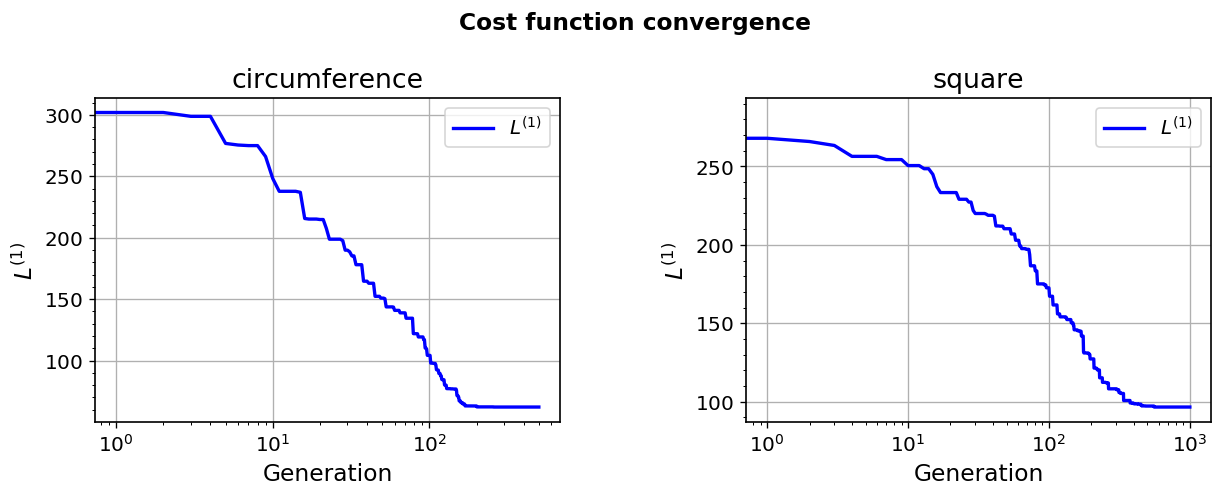

In [28]:
optimal_lenght = np.loadtxt("data/convergence/circle_opt_lenght.txt").T
optimal_lenght2 = np.loadtxt("data/convergence/square_opt_lenght.txt").T

plt.figure(figsize=(12, 4), dpi=120)
mpl.rcParams['figure.subplot.top'] = 0.8
plt.suptitle("Cost function convergence", size = 14)
plt.subplot(1, 2, 1);
plt.plot(optimal_lenght[0], optimal_lenght[1], 'b-', label = '$L^{(1)}$')
plt.legend()
plt.xlabel("Generation")
plt.ylabel("$L^{(1)}$")
plt.title('circumference')
plt.semilogx()
plt.subplot(1, 2, 2);
plt.plot(optimal_lenght2[0], optimal_lenght2[1], 'b-',label = '$L^{(1)}$')
plt.legend()
plt.xlabel("Generation")
plt.ylabel("$L^{(1)}$")
plt.semilogx()
plt.title('square')
plt.show()

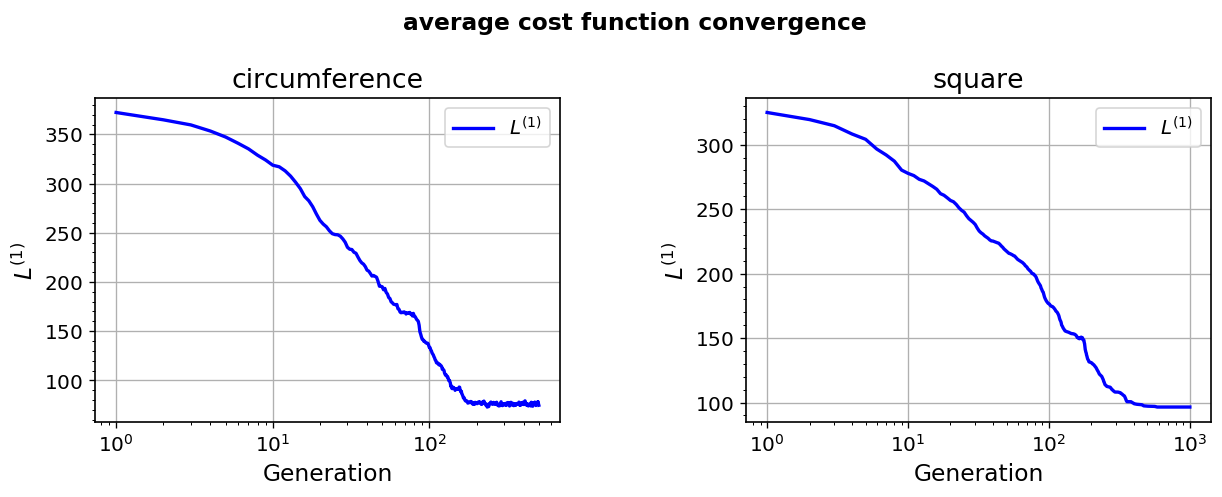

In [29]:
ave1 = np.loadtxt("data/convergence/circle_ave_lossfunction.txt").T
ave2 = np.loadtxt("data/convergence/square_ave_lossfunction.txt").T

plt.figure(figsize=(12, 4), dpi=120)
mpl.rcParams['figure.subplot.top'] = 0.8
plt.suptitle("average cost function convergence", size = 14)
plt.subplot(1, 2, 1);
plt.plot(ave1[0], ave1[1], 'b-', label = '$L^{(1)}$')
plt.legend()
plt.xlabel("Generation")
plt.ylabel("$L^{(1)}$")
plt.title('circumference')
plt.semilogx()
plt.subplot(1, 2, 2);
plt.plot(ave2[0], ave2[1], 'b-',label = '$L^{(1)}$')
plt.legend()
plt.xlabel("Generation")
plt.ylabel("$L^{(1)}$")
plt.title('square')
plt.semilogx()
plt.show()